## OFERTA RESIDENCIAL - ZONA SUR

In [1]:
from REM.properaty_data import *
from REM.datasources import *

/home/federico/federico/CEEU/bolimpico/venv/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
bbox = get_bbox_sur()
query_sur = get_query(bbox, sd='2021-01-01',ed='2022-08-14')
client = get_client()

In [3]:
oferta_residencial = query_properati(client=client, query=query_sur)

In [4]:
len(oferta_residencial)

50825

In [5]:
oferta_residencial['surface_total'].isna().value_counts()

True     26604
False    24221
Name: surface_total, dtype: int64

In [7]:
oferta_residencial.columns

Index(['latitud', 'longitud', 'localidad', 'start_date', 'type', 'type_i18n',
       'surface_total', 'surface_covered', 'price', 'description', 'periodo'],
      dtype='object')

In [6]:
oferta_residencial.to_csv('../data/oferta_residencial_properaty.csv')

In [13]:
propiedades = gpd.GeoDataFrame(oferta_residencial, crs=4326, 
                               geometry=gpd.points_from_xy(oferta_residencial['longitud'], 
                                                           oferta_residencial['latitud']))

In [2]:
parcelas = caba_parcelas(source_idx=1)

Reading parcels from local dir ...


In [3]:
mascara = BO_Area()

In [4]:
build_study_area(parcelas, mascara)

/home/federico/federico/CEEU/bolimpico/REM/REM/datasources.py:92: UserWarning: Los sistemas de coordenadas difieren. Adaptando mascara a CRS de parcelas
  warnings.warn("Los sistemas de coordenadas difieren. Adaptando mascara a CRS de parcelas")


,fid_1,featid1,manzana,obs,parcela,seccion,smp,partida,sup_edif,unidades,fid_2,barrios,comuna,area,perimeter,acres,dist_m2,hectares,geometry
294228,None,0.0,004A,INFORMACION CONSISTENTE,002,084,084-004A-002,70705,0,0,None,VILLA RIACHUELO,8,4224142.381,10602.868,1043.804,NaN,422.414,"POLYGON ((-58.47014 -34.69774, -58.47025 -34.6..."
294229,None,0.0,004A,INFORMACION CONSISTENTE,001b,084,084-004A-001b,98623,0,0,None,VILLA RIACHUELO,8,4224142.381,10602.868,1043.804,NaN,422.414,"POLYGON ((-58.47002 -34.69763, -58.47014 -34.6..."
294230,None,0.0,004A,INFORMACION CONSISTENTE,001c,084,084-004A-001c,98631,7804,0,None,VILLA RIACHUELO,8,4224142.381,10602.868,1043.804,NaN,422.414,"POLYGON ((-58.46989 -34.69733, -58.47025 -34.6..."
294481,None,101.0,010,INFORMACION CONSISTENTE,013,084,084-010-013,70510,255,0,None,VILLA RIACHUELO,8,4224142.381,10602.868,1043.804,NaN,422.414,"POLYGON ((-58.47054 -34.69615, -58.47061 -34.6..."
294501,None,81.0,010,INFORMACION CONSISTENTE,014d,084,084-010-014d,98453,5705,0,None,VILLA RIACHUELO,8,4224142.381,10602.868,1043.804,NaN,422.414,"POLYGON ((-58.46977 -34.69569, -58.47003 -34.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130320,None,720.0,127,INFORMACION CONSISTENTE,005,044,044-127-005,47407,3182,23,None,PARQUE CHACABUCO,7,3833086.018,8407.200,947.172,1.11,383.309,"POLYGON ((-58.44218 -34.63636, -58.44220 -34.6..."
130310,None,730.0,127,INFORMACION CONSISTENTE,007,044,044-127-007,47409,1986,39,None,PARQUE CHACABUCO,7,3833086.018,8407.200,947.172,1.11,383.309,"POLYGON ((-58.44239 -34.63632, -58.44248 -34.6..."
130322,None,718.0,127,INFORMACION CONSISTENTE,004,044,044-127-004,47406,2231,38,None,PARQUE CHACABUCO,7,3833086.018,8407.200,947.172,1.11,383.309,"POLYGON ((-58.44209 -34.63635, -58.44211 -34.6..."
130303,None,737.0,127,INFORMACION CONSISTENTE,008c,044,044-127-008c,47410,2206,30,None,PARQUE CHACABUCO,7,3833086.018,8407.200,947.172,1.11,383.309,"POLYGON ((-58.44250 -34.63626, -58.44266 -34.6..."


In [10]:
parcelas = parcelas_sur() # sobrescribo con nueva capa de parcelas que abarca menos area

In [137]:
parcelas_posta = gpd.read_file('../data/BarOli_V1/layers/parcelas copiar copiar.shp')

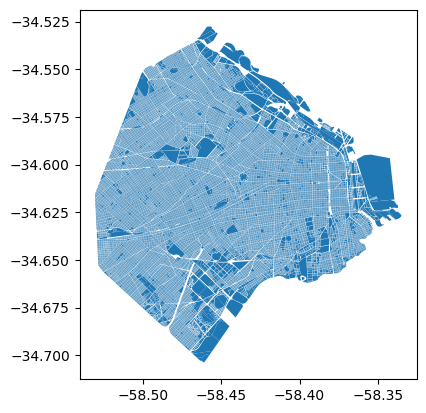

In [139]:
parcelas_posta.plot();

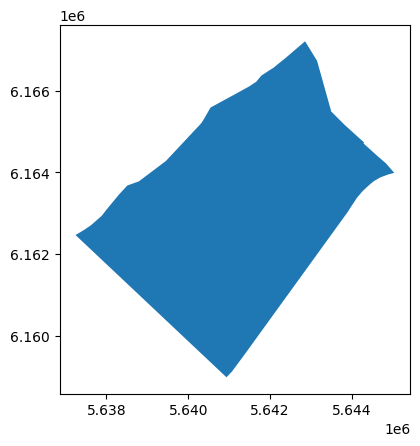

In [151]:
l = gpd.read_file('../data/BarOli_V1/layers/P_BP_AREA_5347.shp')
l.plot();

In [149]:
import matplotlib.pyplot as plt

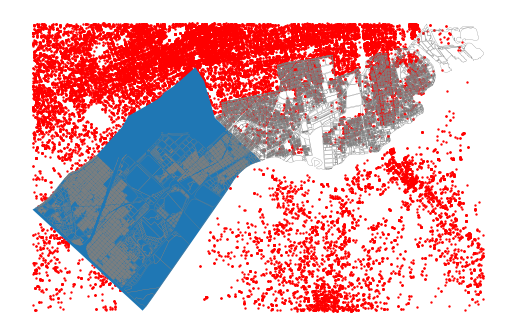

In [152]:
f, ax= plt.subplots()
parcelas.geometry.boundary.plot(ax=ax, linewidth=0.2, edgecolor='gray')
propiedades.plot(ax=ax, color='red', markersize=0.5)
l.to_crs(4326).plot(ax=ax);
ax.set_axis_off();

In [153]:
l = l.to_crs(parcelas_posta.crs)
parcelas_posta_ = parcelas_posta.clip(l)
len(parcelas_posta_)

28070

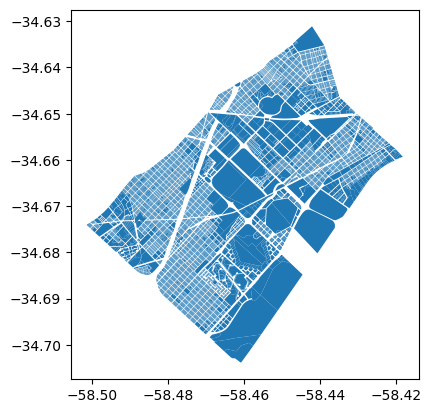

In [154]:
parcelas_posta_.plot();

In [157]:
parcelas = parcelas_posta_ # Reescribo el viejo parcelas

In [20]:
propiedades_ = ajuste_inflacion(propiedades)

In [136]:
propiedades_

,latitud,longitud,localidad,start_date,type,type_i18n,surface_total,surface_covered,price,description,periodo,geometry,year,month,period,price_adj
0,-34.635121,-58.451315,Flores,2021-12-04,Departamento,Departamento,90,90,235000,Departamento 3 amb c/dep - a metro...,12-2021,POINT (-58.45132 -34.63512),2021,12,2021-12,236907
1,-34.618014,-58.468409,Flores,2021-12-04,Departamento,Departamento,52,52,100000,Venta. Excelente y Luminosos Dto. de 4 Amb. co...,12-2021,POINT (-58.46841 -34.61801),2021,12,2021-12,100811
2,-34.628946,-58.453467,Flores,2021-12-04,Departamento,Departamento,<NA>,<NA>,90000,EXCELENTE DEPARTAMENTO MUY LUMINOSO \r\n\r\nUB...,12-2021,POINT (-58.45347 -34.62895),2021,12,2021-12,90730
3,-34.628946,-58.453467,Flores,2021-12-04,Departamento,Departamento,<NA>,<NA>,90000,EXCELENTE DEPARTAMENTO MUY LUMINOSO \r\n\r\nUB...,12-2021,POINT (-58.45347 -34.62895),2021,12,2021-12,90730
4,-34.629654,-58.453879,Flores,2021-12-04,Departamento,Departamento,<NA>,<NA>,189000,"Venta de Departamento 3 AMBIENTES en Flores, C...",12-2021,POINT (-58.45388 -34.62965),2021,12,2021-12,190534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50616,-34.667093,-58.483888,Villa Lugano,2021-01-23,Departamento,Departamento,<NA>,60,98000,Departamento en Venta de 1 dorm. en Capital Fe...,01-2021,POINT (-58.48389 -34.66709),2021,1,2021-1,98577
50617,-34.627433,-58.382393,Constitución,2021-01-23,Departamento,Departamento,36,<NA>,45000,Excelente 2 Ambientes Interno. Pisos plastific...,01-2021,POINT (-58.38239 -34.62743),2021,1,2021-1,45265
50618,-34.618673,-58.403974,San Cristobal,2021-01-23,Departamento,Departamento,<NA>,<NA>,103000,Venta de Departamento 2 AMBIENTES en San Crist...,01-2021,POINT (-58.40397 -34.61867),2021,1,2021-1,103607
50619,-34.638424,-58.433773,Parque Chacabuco,2021-01-23,PH,PH,<NA>,70,119000,***** RESERVADO *****<br>PH 4 ambientes - Ven...,01-2021,POINT (-58.43377 -34.63842),2021,1,2021-1,119701


In [159]:
propiedades_pclas = gpd.sjoin(propiedades_, parcelas[['smp','geometry']], predicate='within')

In [23]:
len(propiedades_pclas)

5783

In [160]:
len(propiedades_pclas) # solo el area de estudio

1607

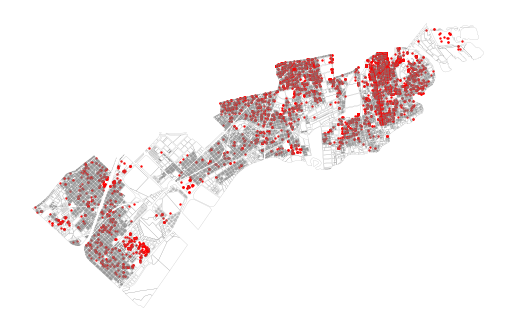

In [28]:
f, ax= plt.subplots()
propiedades_pclas.plot(ax=ax, color='red', markersize=0.5)
parcelas.geometry.boundary.plot(ax=ax, linewidth=0.1, edgecolor='gray')
ax.set_axis_off();

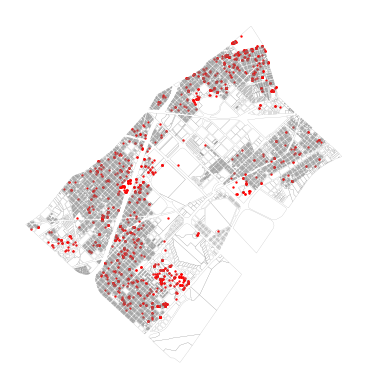

In [161]:
f, ax= plt.subplots()
propiedades_pclas.plot(ax=ax, color='red', markersize=0.5)
parcelas.geometry.boundary.plot(ax=ax, linewidth=0.1, edgecolor='gray')
ax.set_axis_off();

In [31]:
propiedades_pclas.surface_total.isna().value_counts()

True     3096
False    2687
Name: surface_total, dtype: int64

In [162]:
propiedades_pclas.surface_total.isna().value_counts() # en el area de esrudio

True     838
False    769
Name: surface_total, dtype: int64

In [163]:
nvas_construcciones = propiedades_pclas.loc[propiedades_pclas['type'].isin(['Casa','PH','Lote'])].copy()

In [164]:
superficies = []

for r in nvas_construcciones.iterrows():
    if pd.isna(r[1].surface_total):
        if pd.isna(r[1].surface_covered):
            superficies.append(r[1].surface_total)
        elif pd.isna(r[1].surface_covered) == False:
            # tomamos superficie cubierta como valida
            superficies.append(r[1].surface_covered)
        else:
            pass
    else:
        superficies.append(r[1].surface_total)

In [165]:
nvas_construcciones['sup'] = superficies

In [166]:
nvas_construcciones['sup'].isna().value_counts()

False    405
True     369
Name: sup, dtype: int64

<AxesSubplot:>

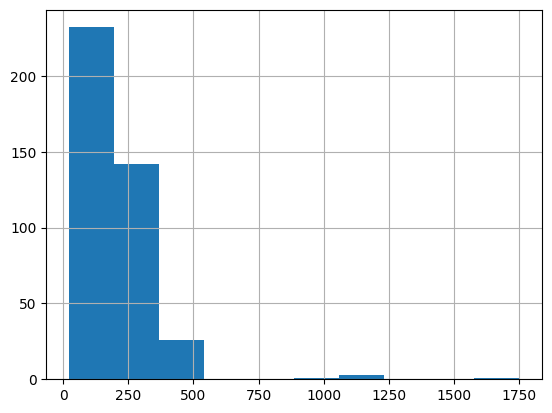

In [167]:
nvas_construcciones['sup'].hist()

In [168]:
nvas_construcciones['sup'].median()

169.0

In [169]:
nvas_construcciones.columns

Index(['latitud', 'longitud', 'localidad', 'start_date', 'type', 'type_i18n',
       'surface_total', 'surface_covered', 'price', 'description', 'periodo',
       'geometry', 'year', 'month', 'period', 'price_adj', 'index_right',
       'smp', 'sup'],
      dtype='object')

In [170]:
nvas_construcciones['sup_tot'] = nvas_construcciones['sup'].fillna(0)
nvas_construcciones['sup_tot_f'] = nvas_construcciones['sup'].fillna(nvas_construcciones['sup'].median())

nvas_construcciones['usdm2'] = nvas_construcciones['price_adj']/nvas_construcciones['sup_tot']
nvas_construcciones['usdm2_f'] = nvas_construcciones['price_adj']/nvas_construcciones['sup_tot_f']

In [171]:
nvas_construcciones.head()

,latitud,longitud,localidad,start_date,type,type_i18n,surface_total,surface_covered,price,description,...,month,period,price_adj,index_right,smp,sup,sup_tot,sup_tot_f,usdm2,usdm2_f
84,-34.644476,-58.439484,Parque Chacabuco,2021-12-03,PH,PH,122,53,65000,PH en dos plantas con acceso directo en primer...,...,12,2021-12,65527,125980,044-120B-022a,122,122,122.0,537.106557,537.106557
6500,-34.644476,-58.439484,Parque Chacabuco,2021-10-21,PH,PH,122,53,65000,PH en dos plantas con acceso directo en primer...,...,10,2021-10,65504,125980,044-120B-022a,122,122,122.0,536.918033,536.918033
9578,-34.644476,-58.439484,Parque Chacabuco,2021-09-09,PH,PH,122,53,65000,PH en dos plantas con acceso directo en primer...,...,9,2021-9,65489,125980,044-120B-022a,122,122,122.0,536.795082,536.795082
12829,-34.644476,-58.439484,Parque Chacabuco,2021-07-07,PH,PH,122,53,65000,PH en dos plantas con acceso directo en primer...,...,7,2021-7,65465,125980,044-120B-022a,122,122,122.0,536.598361,536.598361
22275,-34.644476,-58.439484,Parque Chacabuco,2021-05-29,PH,PH,<NA>,53,80000,PH en dos plantas con acceso directo en primer...,...,5,2021-5,80550,125980,044-120B-022a,53,53,53.0,1519.811321,1519.811321


### * USD/M2 CON DEMOLICION

In [172]:
ref_price = nvas_construcciones.groupby('smp')[['price_adj','usdm2','usdm2_f']].mean()

In [173]:
parcelas['usdm2'] = parcelas['smp'].map(ref_price['usdm2'])
parcelas['usdm2_f'] = parcelas['smp'].map(ref_price['usdm2_f'])
parcelas['price_adj'] = parcelas['smp'].map(ref_price['price_adj'])

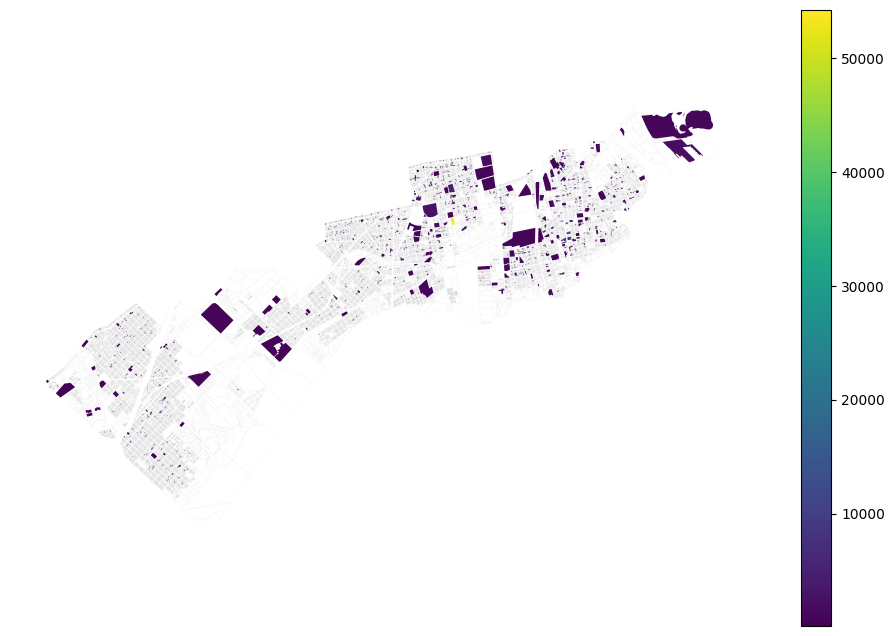

In [124]:
f, ax = plt.subplots(figsize=(12,8))

parcelas.geometry.boundary.plot(ax=ax, color='black', linewidth=0.01)
parcelas.plot(column='usdm2_f', ax=ax, legend=True)
ax.set_axis_off();

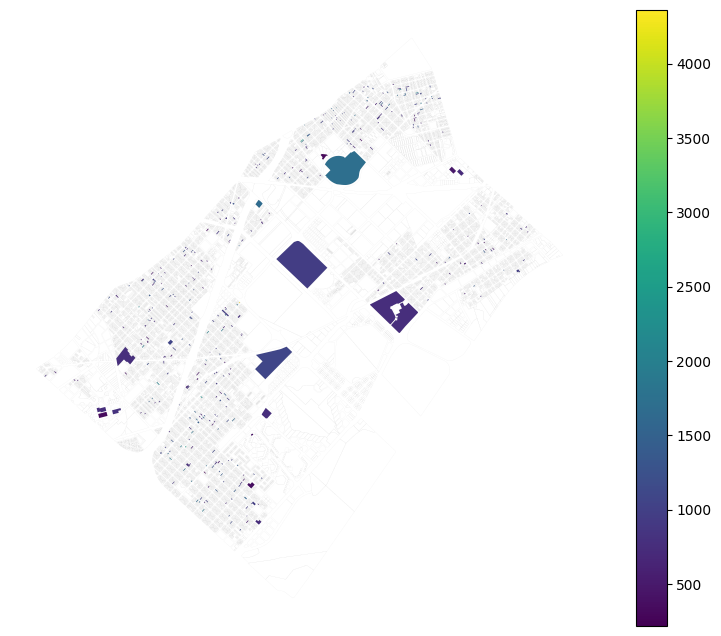

In [174]:
f, ax = plt.subplots(figsize=(12,8))

parcelas.geometry.boundary.plot(ax=ax, color='black', linewidth=0.01)
parcelas.plot(column='usdm2_f', ax=ax, legend=True)
ax.set_axis_off();

In [129]:
import numpy as np

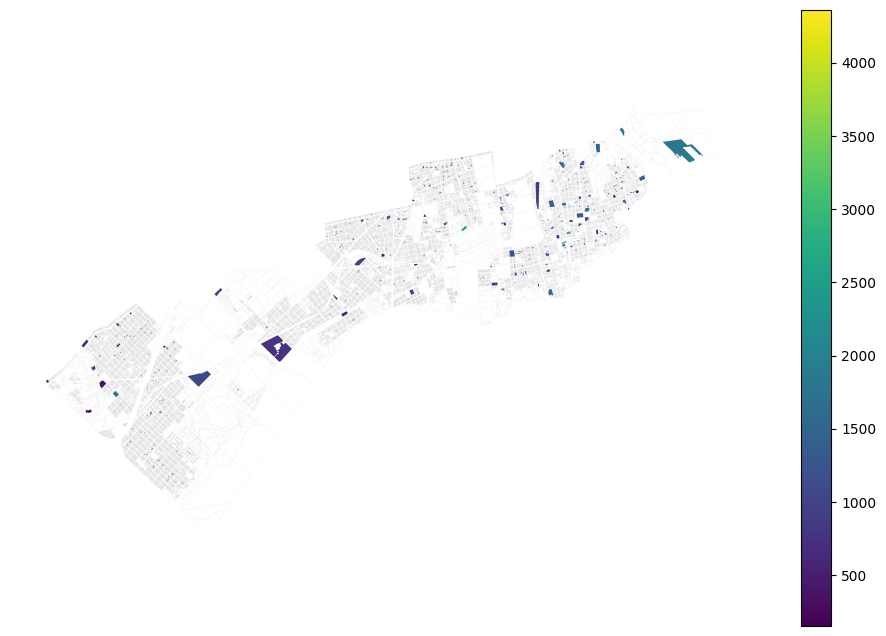

In [133]:
f, ax = plt.subplots(figsize=(12,8))

parcelas.geometry.boundary.plot(ax=ax, color='black', linewidth=0.01)
parcelas[~parcelas['usdm2'].isin([np.nan, np.inf, -np.inf])].plot(column='usdm2', ax=ax, legend=True)
ax.set_axis_off();

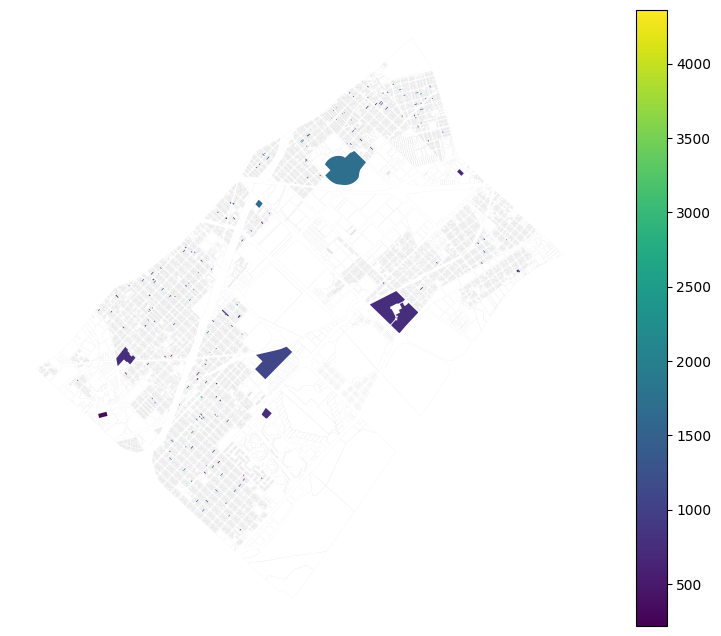

In [175]:
f, ax = plt.subplots(figsize=(12,8))

parcelas.geometry.boundary.plot(ax=ax, color='black', linewidth=0.01)
parcelas[~parcelas['usdm2'].isin([np.nan, np.inf, -np.inf])].plot(column='usdm2', ax=ax, legend=True)
ax.set_axis_off();

In [176]:
parcelas.to_file('../data/parcelas_sur_prices_.geojson', driver='GeoJSON')